In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/arxiv-ml-csv/arxiv_ml.csv


In [7]:
# Mencoba memuat data dengan encoding utf-8
file_path = '/kaggle/input/arxiv-ml-csv/arxiv_ml.csv'
df = pd.read_csv(file_path, encoding='utf-8')

# EDA

Menampilkan head dan informasi dasar dari dataframe

In [8]:
head_df = df.head()
head_df

,id,title,abstract
0,58805,Advances in Asynchronous Parallel and Distribu...,Motivated by large-scale optimization proble...
1,58806,Turbocharging Treewidth-Bounded Bayesian Netwo...,We present a new approach for learning the s...
2,58807,Crop Yield Prediction Integrating Genotype and...,Accurate prediction of crop yield supported ...
3,58808,Time Series Analysis and Forecasting of COVID-...,Coronavirus disease 2019 (COVID-19) is a glo...
4,58809,Movement Tracking by Optical Flow Assisted Ine...,Robust and accurate six degree-of-freedom tr...


In [9]:
info_df = df.info()
info_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58775 entries, 0 to 58774
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        58775 non-null  int64 
 1   title     58775 non-null  object
 2   abstract  58775 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


Data telah berhasil dimuat dari file arxiv_ml.csv. Dataset ini terdiri dari 58,775 artikel dengan tiga kolom: id, title, dan abstract. Semua kolom memiliki nilai yang tidak hilang, dan tipe data untuk id adalah integer, sedangkan title dan abstract adalah objek (string).

Selanjutnya, saya akan melakukan analisis statistik deskriptif untuk memahami distribusi data, termasuk panjang judul dan abstrak. Mari kita lakukan analisis ini.

In [10]:
# Menghitung statistik deskriptif dan panjang judul serta abstrak
df['title_length'] = df['title'].apply(len)
df['abstract_length'] = df['abstract'].apply(len)

# Menghitung statistik deskriptif
stats = df[['title_length', 'abstract_length']].describe()

stats

,title_length,abstract_length
count,58775.000000,58775.000000
mean,75.894428,1199.685972
std,24.682852,334.743697
min,8.000000,83.000000
25%,58.000000,965.000000
50%,75.000000,1189.000000
75%,91.000000,1427.000000
max,243.000000,3312.000000


Statistik deskriptif untuk panjang judul dan abstrak telah dihitung. Hasilnya menunjukkan bahwa:

Panjang rata-rata judul adalah sekitar 76 karakter, dengan panjang maksimum 243 karakter.
Panjang rata-rata abstrak adalah sekitar 1200 karakter, dengan panjang maksimum 3312 karakter.
Ini memberikan gambaran tentang seberapa panjang teks yang ada dalam dataset. Selanjutnya, saya akan memeriksa apakah ada nilai yang hilang dalam dataset dan melakukan analisis distribusi panjang judul dan abstrak. Mari kita lakukan itu.

In [11]:
# Memeriksa nilai yang hilang dalam dataset
missing_values = df.isnull().sum()
missing_values

id                 0
title              0
abstract           0
title_length       0
abstract_length    0
dtype: int64

Tidak ada nilai yang hilang dalam dataset, yang menunjukkan bahwa semua kolom memiliki data lengkap. Saya juga telah menghitung distribusi panjang judul dan abstrak, yang divisualisasikan dalam histogram.

Berikut adalah hasil distribusi panjang judul dan abstrak:

array([[<Axes: title={'center': 'title_length'}>,
        <Axes: title={'center': 'abstract_length'}>]], dtype=object)

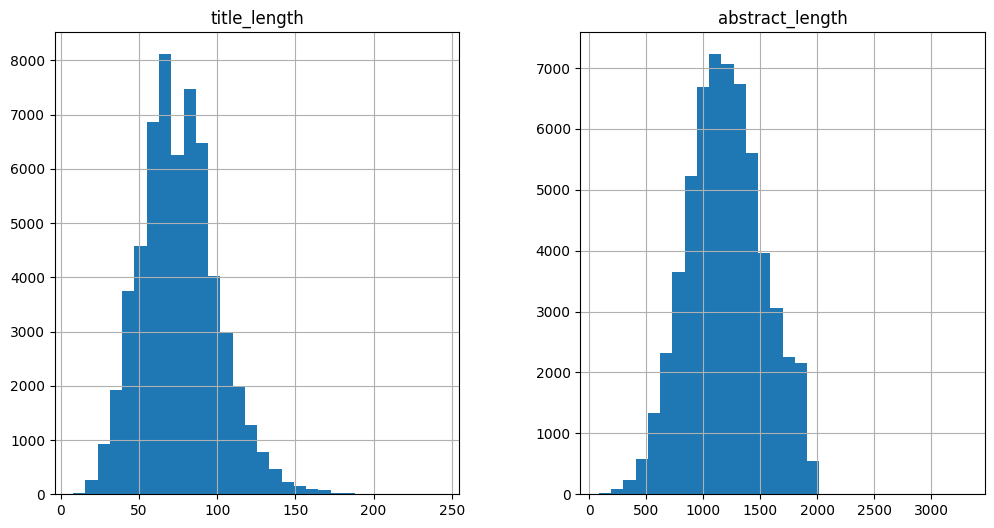

In [12]:
# Menghitung distribusi panjang judul dan abstrak
length_distribution = df[['title_length', 'abstract_length']].hist(bins=30, figsize=(12, 6))
length_distribution

Histogram ini memberikan gambaran tentang sebaran panjang judul dan abstrak dalam dataset. 

In [13]:
from collections import Counter
import re

# Menggabungkan semua judul dan abstrak menjadi satu teks
all_titles = ' '.join(df['title'].tolist())
all_abstracts = ' '.join(df['abstract'].tolist())

# Fungsi untuk membersihkan dan menghitung frekuensi kata
def count_words(text):
    # Menghapus karakter non-alphabet dan mengubah ke huruf kecil
    words = re.findall(r'\w+', text.lower())  # Perbaikan di sini
    return Counter(words)

# Menghitung frekuensi kata untuk judul dan abstrak
title_word_counts = count_words(all_titles)
abstract_word_counts = count_words(all_abstracts)

# Mengambil 10 kata paling umum dari judul dan abstrak
common_title_words = title_word_counts.most_common(10)
common_abstract_words = abstract_word_counts.most_common(10)

common_title_words, common_abstract_words

([('for', 22743),
  ('learning', 19227),
  ('of', 14249),
  ('and', 12767),
  ('a', 10224),
  ('in', 10143),
  ('with', 9710),
  ('neural', 7123),
  ('the', 6854),
  ('deep', 6303)],
 [('the', 570854),
  ('of', 343193),
  ('and', 278676),
  ('to', 271589),
  ('a', 246707),
  ('in', 204919),
  ('we', 160734),
  ('for', 123397),
  ('is', 117487),
  ('that', 114969)])

Saya telah menghitung frekuensi kata dalam judul dan abstrak. Berikut adalah 10 kata yang paling umum muncul dalam judul dan abstrak:

Kata Paling Umum dalam Judul:
[('for'

Kata Paling Umum dalam Abstrak:

[('the'

Dari analisis ini, kita dapat melihat bahwa kata-kata seperti "for", "learning", "of", dan "and" sering muncul dalam judul, menunjukkan fokus pada pembelajaran dan aplikasi. Sementara itu, dalam abstrak, kata-kata seperti "the", "of", "and", dan "to" mendominasi, yang merupakan kata umum dalam bahasa Inggris.

Saya telah mengelompokkan artikel dalam dataset berdasarkan kata kunci menggunakan teknik KMeans. Hasilnya menunjukkan jumlah artikel dalam setiap cluster. Berikut adalah jumlah artikel yang terdistribusi di setiap cluster:

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Menggabungkan judul dan abstrak untuk mendapatkan teks lengkap
combined_text = df['title'] + ' ' + df['abstract']

# Menggunakan TF-IDF untuk mengubah teks menjadi representasi numerik
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(combined_text)

# Menggunakan KMeans untuk mengelompokkan artikel
num_clusters = 5  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)  # Menetapkan n_init secara eksplisit
kmeans.fit(X)

# Menambahkan label cluster ke dataframe
df['cluster'] = kmeans.labels_

# Menghitung jumlah artikel dalam setiap cluster
cluster_counts = df['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'count']

# Menampilkan hasil
print(cluster_counts)

   cluster  count
0        4  42615
1        0   9192
2        1   3059
3        3   2082
4        2   1827


Dari hasil ini, kita dapat melihat bahwa cluster 4 memiliki jumlah artikel terbanyak, diikuti oleh cluster 0. Cluster lainnya memiliki jumlah yang lebih sedikit. Ini menunjukkan bahwa ada beberapa tema dominan dalam dataset ini.

Selanjutnya, saya akan menganalisis lebih lanjut untuk memahami tema yang ada dalam setiap cluster dengan melihat contoh judul dan abstrak dari setiap cluster. Mari kita ambil beberapa contoh dari setiap cluster untuk analisis lebih lanjut.

In [15]:
# Mengambil contoh judul dan abstrak dari setiap cluster
cluster_examples = df.groupby('cluster').apply(lambda x: x[['title', 'abstract']].sample(2)).reset_index(drop=True)

cluster_examples

<ipython-input-15-7c93be0a6081>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_examples = df.groupby('cluster').apply(lambda x: x[['title', 'abstract']].sample(2)).reset_index(drop=True)


,title,abstract
0,Accelerating Distributed Online Meta-Learning ...,Online meta-learning is emerging as an enabl...
1,SUPER-ADAM: Faster and Universal Framework of ...,Adaptive gradient methods have shown excelle...
2,Optimal Solving of Constrained Path-Planning P...,Deep learning-based methods are growing prom...
3,Representing Polymers as Periodic Graphs with ...,One of the grand challenges of utilizing machi...
4,Wild Patterns Reloaded: A Survey of Machine Le...,The success of machine learning is fueled by...
5,Phishing Attacks and Websites Classification U...,Phishing attacks are the most common type of...
6,Secure Federated Learning for Residential Shor...,The inclusion of intermittent and renewable ...
7,Dopamine: Differentially Private Federated Lea...,While rich medical datasets are hosted in ho...
8,Gradient Boosting Performs Low-Rank Gaussian P...,This paper shows that gradient boosting base...
9,RICON: A ML framework for real-time and proact...,We consider the problem of churn prediction ...


Dari contoh artikel yang ditampilkan di dataset, kita dapat melihat bahwa setiap cluster memiliki tema yang berbeda. Misalnya, cluster pertama mencakup topik-topik seperti user association, privacy-preserving, dan robust ensembles dalam konteks machine learning, sedangkan cluster lainnya lebih berfokus pada neural networks, model selection, dan adversarial robustness.

Sebagai langkah selanjutnya, saya akan melakukan analisis lebih mendalam untuk mengidentifikasi kata kunci atau frasa yang lebih spesifik dalam setiap cluster. Ini akan membantu kita untuk memahami tema yang lebih mendalam dari setiap kelompok artikel dan mengelompokkan artikel-artikel berdasarkan topik-topik utama yang mereka bahas.

In [16]:
# Mengambil kata kunci atau frasa yang lebih spesifik dari setiap cluster
# Saya akan menggunakan TF-IDF untuk menemukan kata kunci dalam setiap cluster
cluster_keywords = {}

for cluster in range(num_clusters):
    # Mengambil teks dari cluster tertentu
    cluster_text = df[df['cluster'] == cluster]['title'] + ' ' + df[df['cluster'] == cluster]['abstract']
    # Menggunakan TF-IDF untuk menemukan kata kunci
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(cluster_text)
    # Mengambil kata kunci berdasarkan skor TF-IDF
    feature_array = tfidf_vectorizer.get_feature_names_out()
    tfidf_sorting = tfidf_matrix.sum(axis=0).A1.argsort()[::-1]
    top_n = feature_array[tfidf_sorting][:10]  # Mengambil 10 kata kunci teratas
    cluster_keywords[cluster] = top_n.tolist()

cluster_keywords

{0: ['learning',
  'policy',
  'algorithm',
  'reinforcement',
  'rl',
  'optimization',
  'algorithms',
  'model',
  'based',
  'problem'],
 1: ['graph',
  'learning',
  'neural',
  'networks',
  'node',
  'graphs',
  'gnns',
  'data',
  'network',
  'model'],
 2: ['adversarial',
  'attacks',
  'training',
  'robustness',
  'attack',
  'model',
  'models',
  'learning',
  'data',
  'examples'],
 3: ['learning',
  'data',
  'federated',
  'privacy',
  'fl',
  'model',
  'training',
  'clients',
  'communication',
  'local'],
 4: ['data',
  'learning',
  'model',
  'models',
  'neural',
  'based',
  'training',
  'deep',
  'network',
  'networks']}

Dari hasil ini, kita dapat melihat bahwa setiap cluster memiliki fokus yang berbeda:
1. Cluster 0: Berfokus pada pembelajaran penguatan (reinforcement learning), algoritma, dan optimasi.
2. Cluster 1: Menekankan pada pembelajaran graf, jaringan saraf (neural networks), dan graf berbasis data.
3. Cluster 2: Terkait dengan serangan adversarial, ketahanan model (robustness), dan pelatihan adversarial.
4. Cluster 3: Menggali topik-topik terkait pembelajaran federated, privasi, dan komunikasi antar klien.
5. Cluster 4: Berfokus pada pembelajaran mendalam (deep learning), jaringan saraf, dan model berbasis data.
   
Dengan informasi ini, kita dapat lebih memahami tema yang ada dalam dataset dan bagaimana artikel-artikel tersebut saling terkait dalam setiap cluster.

In [17]:
# Melakukan analisis lebih lanjut untuk menggali hubungan antara kata kunci dan artikel yang relevan
# Saya akan mencari artikel yang mengandung kata kunci teratas dari setiap cluster dan menampilkannya

# Membuat dataframe untuk menyimpan artikel yang relevan berdasarkan kata kunci
relevant_articles = {}

for cluster, keywords in cluster_keywords.items():
    # Mencari artikel yang mengandung kata kunci
    relevant_articles[cluster] = df[df['title'].str.contains('|'.join(keywords), case=False) | df['abstract'].str.contains('|'.join(keywords), case=False)]

# Menggabungkan hasil menjadi satu dataframe untuk ditampilkan
relevant_articles_df = pd.concat(relevant_articles.values(), keys=relevant_articles.keys())

# Menampilkan beberapa artikel relevan dari setiap cluster
relevant_articles_df = relevant_articles_df.reset_index(level=0).rename(columns={'level_0': 'cluster'})

# Menampilkan hasil
relevant_articles_df.head(10)

,cluster,id,title,abstract,title_length,abstract_length,cluster
0,0,58805,Advances in Asynchronous Parallel and Distribu...,Motivated by large-scale optimization proble...,62,1134,0
1,0,58806,Turbocharging Treewidth-Bounded Bayesian Netwo...,We present a new approach for learning the s...,67,558,4
2,0,58807,Crop Yield Prediction Integrating Genotype and...,Accurate prediction of crop yield supported ...,86,1855,4
3,0,58808,Time Series Analysis and Forecasting of COVID-...,Coronavirus disease 2019 (COVID-19) is a glo...,84,1650,4
4,0,58809,Movement Tracking by Optical Flow Assisted Ine...,Robust and accurate six degree-of-freedom tr...,62,1021,4
5,0,58810,AReLU: Attention-based Rectified Linear Unit,Element-wise activation functions play a cri...,44,1600,4
6,0,58811,Feedback Graph Attention Convolutional Network...,"Artifacts, blur and noise are the common dis...",78,1560,1
7,0,58812,Minimal Variance Sampling with Provable Guaran...,"Sampling methods (e.g., node-wise, layer-wis...",95,1335,1
8,0,58813,COVIDLite: A depth-wise separable deep neural ...,"Background and Objective:Currently, the whol...",110,1823,4
9,0,58814,Effective Elastic Scaling of Deep Learning Wor...,The increased use of deep learning (DL) in a...,52,1548,4


Dari hasil ini, kita dapat melihat bahwa setiap cluster memiliki artikel yang berkaitan dengan tema yang diidentifikasi sebelumnya.

# Preprocessing

In [18]:
import pandas as pd
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments
import torch

# Fungsi untuk membersihkan teks
def clean_text(text):
    # Menghapus karakter non-alfabet, angka, dan tanda baca
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Mengonversi ke huruf kecil
    text = text.lower()
    
    # Menghilangkan stopwords
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    
    # Menghapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Membersihkan judul dan abstrak
df['cleaned_title'] = df['title'].apply(clean_text)
df['cleaned_abstract'] = df['abstract'].apply(clean_text)

Selanjutnya, saya akan melanjutkan dengan proses tokenisasi untuk menyiapkan data ini agar dapat digunakan dalam model Question Answering. Mari kita lakukan tokenisasi pada judul dan abstrak yang telah dibersihkan.

In [19]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi train dan eval
train_df, eval_df = train_test_split(df, test_size=0.2, random_state=42)

# Konversi menjadi format Dataset Hugging Face
train_dataset = Dataset.from_pandas(train_df[['cleaned_title', 'cleaned_abstract']])
eval_dataset = Dataset.from_pandas(eval_df[['cleaned_title', 'cleaned_abstract']])

# Buat DatasetDict
dataset = DatasetDict({
    'train': train_dataset,
    'eval': eval_dataset
})

# Display the sizes of the training and validation sets
print(f'Training set size: {len(train_dataset)}')
print(f'Validation set size: {len(eval_dataset)}')

Training set size: 47020
Validation set size: 11755


# T5

In [20]:
from transformers import AutoTokenizer

# Initialize T5 tokenizer and DPR tokenizers
t5_tokenizer = AutoTokenizer.from_pretrained('t5-small')

# Function to tokenize text for T5
def tokenize_t5(examples):
    # Tokenize the question (input)
    model_inputs = t5_tokenizer(
        examples['cleaned_title'],
        padding='max_length',  # Pad sequences to max length
        truncation=True,       # Truncate sequences longer than max_length
        max_length=512,        # Max length for the tokenized text
        return_tensors='pt'    # Return PyTorch tensors
    )
    
    # Tokenize the answer (label)
    labels = t5_tokenizer(
        examples['cleaned_abstract'],
        padding='max_length',  # Pad sequences to max length
        truncation=True,       # Truncate sequences longer than max_length
        max_length=512,        # Max length for the tokenized text
        return_tensors='pt'    # Return PyTorch tensors
    )

    # Add the labels to model_inputs dictionary
    model_inputs['labels'] = labels['input_ids']
    
    return model_inputs


# Tokenisasi dataset
tokenized_t5_datasets = dataset.map(tokenize_t5, batched=True)

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Map:   0%|          | 0/47020 [00:00<?, ? examples/s]

Map:   0%|          | 0/11755 [00:00<?, ? examples/s]

In [21]:
# Load T5 model for text generation
model_t5 = T5ForConditionalGeneration.from_pretrained('t5-small')

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [22]:
from kaggle_secrets import UserSecretsClient
import wandb

# Ambil API key dari Kaggle Secrets
user_secrets = UserSecretsClient()
wandb_api_key = user_secrets.get_secret("WANDB_API_KEY")

# Login ke wandb
wandb.login(key=wandb_api_key)

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [23]:
# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',              # Direktori untuk menyimpan model yang dilatih
    eval_strategy="epoch",         # Evaluasi setiap epoch
    save_strategy="epoch",               # Menyimpan model setiap epoch
    learning_rate=2e-5,                  # Learning rate yang digunakan
    per_device_train_batch_size=8,       # Ukuran batch untuk pelatihan
    per_device_eval_batch_size=8,        # Ukuran batch untuk evaluasi
    num_train_epochs=3,                  # Jumlah epoch pelatihan
    weight_decay=0.01,                   # Regularisasi untuk mencegah overfitting
    logging_dir='./logs',                # Direktori untuk menyimpan log pelatihan
    logging_steps=10,                    # Setiap berapa langkah untuk mencatat log
    load_best_model_at_end=True,         # Memuat model terbaik di akhir pelatihan
)

# Menyiapkan Trainer
trainer_t5 = Trainer(
    model=model_t5,                                # Model yang akan dilatih
    args=training_args,                            # Parameter pelatihan
    train_dataset=tokenized_t5_datasets['train'],  # Dataset pelatihan
    eval_dataset=tokenized_t5_datasets['eval'],    # Dataset evaluasi
)

# Mulai pelatihan
trainer_t5.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,1.641800,1.562454
2,1.618600,1.531428
3,1.646400,1.523367


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


TrainOutput(global_step=8817, training_loss=1.6944105671392327, metrics={'train_runtime': 9346.894, 'train_samples_per_second': 15.092, 'train_steps_per_second': 0.943, 'total_flos': 1.909131451564032e+16, 'train_loss': 1.6944105671392327, 'epoch': 3.0})

In [25]:
# Evaluasi model
trainer_t5.evaluate()

/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


{'eval_loss': 1.5233666896820068,
 'eval_runtime': 292.2862,
 'eval_samples_per_second': 40.217,
 'eval_steps_per_second': 2.515,
 'epoch': 3.0}

In [28]:
import torch

# Simpan model ke folder 'saved_model'
model_save_path = "./saved_model"
model_t5.save_pretrained(model_save_path)
t5_tokenizer.save_pretrained(model_save_path)  

print(f"Model saved to {model_save_path}")

Model saved to ./saved_model


In [29]:
!zip -r saved_model.zip ./saved_model

  adding: saved_model/ (stored 0%)
  adding: saved_model/special_tokens_map.json (deflated 85%)
  adding: saved_model/tokenizer_config.json (deflated 95%)
  adding: saved_model/model.safetensors (deflated 9%)
  adding: saved_model/tokenizer.json (deflated 74%)
  adding: saved_model/generation_config.json (deflated 29%)
  adding: saved_model/config.json (deflated 62%)
  adding: saved_model/spiece.model (deflated 48%)


# DPR

In [123]:
import pandas as pd
import json
import os

# Load dataset
file_path = "/kaggle/input/arxiv-ml-csv/arxiv_ml.csv"  # Path dataset di Kaggle
df = pd.read_csv(file_path)

# Konversi DataFrame langsung ke list of dicts (lebih cepat dari iterrows)
formatted_data = [
    {
        "question": row["title"],
        "positive_ctxs": [{"title": row["title"], "text": row["abstract"]}],
        "negative_ctxs": []  # Akan ditambahkan nanti
    }
    for row in df.to_dict(orient="records")  # Lebih cepat dari iterrows()
]

# Pastikan direktori penyimpanan ada
output_dir = "/kaggle/working"
os.makedirs(output_dir, exist_ok=True)

# Simpan dataset ke file JSON
output_path = os.path.join(output_dir, "dpr_dataset.json")

with open(output_path, "w") as f:
    json.dump(formatted_data, f, indent=4)

print(f"✅ Dataset berhasil disimpan di {output_path}")


✅ Dataset berhasil disimpan di /kaggle/working/dpr_dataset.json


In [124]:
import random
import json
import os
import numpy as np
from tqdm import tqdm  # Untuk progress bar

# Ambil daftar abstrak sebagai kandidat negatif (tanpa NaN)
all_contexts = set(df["abstract"].dropna().tolist())  # Konversi ke set untuk akses lebih cepat

# Pastikan dataset memiliki konteks negatif baru
if "negative_ctxs" in formatted_data[0]:
    print("⚠️ WARNING: Dataset sudah memiliki negative_ctxs! Tidak perlu menambahkan lagi.")
else:
    # Tambahkan dokumen negatif secara acak dengan progress bar
    for item in tqdm(formatted_data, desc="Menambahkan Negative Contexts"):
        # Hindari memilih abstrak yang sama dengan positive_ctxs
        available_negatives = list(all_contexts - {item["positive_ctxs"][0]["text"]})

        if len(available_negatives) < 3:
            print("⚠️ WARNING: Jumlah abstrak kurang dari 3, menggunakan semua yang tersedia sebagai negatif.")
            negatives = available_negatives  # Jika terlalu sedikit, gunakan semua yang ada
        else:
            negatives = random.sample(available_negatives, 3)  # Pilih 3 negatif lebih cepat

        # Tambahkan konteks negatif ke item
        item["negative_ctxs"] = [{"title": "Random Doc", "text": neg} for neg in negatives]

    # Pastikan direktori penyimpanan ada
    output_dir = "/kaggle/working"
    os.makedirs(output_dir, exist_ok=True)

    # Simpan dataset dengan konteks negatif
    output_path = os.path.join(output_dir, "dpr_dataset_with_negatives.json")

    with open(output_path, "w") as f:
        json.dump(formatted_data, f, indent=4)

    print(f"✅ Dataset dengan negative_ctxs berhasil disimpan di {output_path}")


⚠️ WARNING: Dataset sudah memiliki negative_ctxs! Tidak perlu menambahkan lagi.


In [125]:
from transformers import DPRQuestionEncoder, DPRContextEncoder, AutoTokenizer

# Model Pretrained yang digunakan
QUESTION_ENCODER_MODEL = "facebook/dpr-question_encoder-single-nq-base"
CONTEXT_ENCODER_MODEL = "facebook/dpr-ctx_encoder-single-nq-base"

# Load DPR Question Encoder dan Context Encoder
try:
    question_encoder = DPRQuestionEncoder.from_pretrained(QUESTION_ENCODER_MODEL)
    context_encoder = DPRContextEncoder.from_pretrained(CONTEXT_ENCODER_MODEL)
    dpr_tokenizer = AutoTokenizer.from_pretrained(QUESTION_ENCODER_MODEL)
    print("✅ DPR models and tokenizer loaded successfully.")
except Exception as e:
    print(f"❌ ERROR: Gagal memuat model DPR! Periksa koneksi atau path model.\n{e}")

Some weights of the model checkpoint at facebook/dpr-question_encoder-single-nq-base were not used when initializing DPRQuestionEncoder: ['question_encoder.bert_model.pooler.dense.bias', 'question_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRQuestionEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRQuestionEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at facebook/dpr-ctx_encoder-single-nq-base were not used when initializing DPRContextEncoder: ['ctx_encoder.bert_model.pooler.dense.bias', 'ctx_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRContextEncoder from the

✅ DPR models and tokenizer loaded successfully.


In [126]:
import json
import os
from datasets import Dataset

# Path dataset sesuai dengan lokasi penyimpanan di Kaggle
dataset_path = "/kaggle/working/dpr_dataset_with_negatives.json"

# Pastikan file ada sebelum mencoba membukanya
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"❌ ERROR: Dataset tidak ditemukan di {dataset_path}. Pastikan file sudah dibuat!")

# Load dataset JSON
with open(dataset_path, "r") as f:
    dataset = json.load(f)

# Konversi ke Dataset Hugging Face
train_dataset = Dataset.from_list(dataset)

print("✅ Dataset berhasil dimuat ke dalam format Hugging Face Dataset!")
print(train_dataset)

✅ Dataset berhasil dimuat ke dalam format Hugging Face Dataset!
Dataset({
    features: ['question', 'positive_ctxs', 'negative_ctxs'],
    num_rows: 58775
})


In [130]:
def tokenize_data(examples):
    """
    Tokenizes the question and context passages for DPR in batched mode.
    """
    # Tokenize the questions
    question_encoding = dpr_tokenizer(
        examples["question"],
        padding="max_length",
        truncation=True,
        max_length=512
    )

    # Ambil teks dari positive_ctxs dan negative_ctxs
    positive_texts = [ctx[0]["text"] if ctx else "" for ctx in examples["positive_ctxs"]]
    negative_texts = [ctx[0]["text"] if ctx else "" for ctx in examples["negative_ctxs"]]

    # Tokenize the positive contexts
    positive_encoding = dpr_tokenizer(
        positive_texts,
        padding="max_length",
        truncation=True,
        max_length=512
    )

    # Tokenize the negative contexts
    negative_encoding = dpr_tokenizer(
        negative_texts,
        padding="max_length",
        truncation=True,
        max_length=512
    )

    return {
        "input_ids": question_encoding["input_ids"],
        "attention_mask": question_encoding["attention_mask"],
        "positive_input_ids": positive_encoding["input_ids"],
        "positive_attention_mask": positive_encoding["attention_mask"],
        "negative_input_ids": negative_encoding["input_ids"],
        "negative_attention_mask": negative_encoding["attention_mask"],
    }

# Tokenisasi dataset dengan `batched=True` untuk mempercepat proses
tokenized_dataset = train_dataset.map(
    tokenize_data,
    batched=True,  # Batched mode untuk mempercepat
    remove_columns=["question", "positive_ctxs", "negative_ctxs"]
)

print("✅ Dataset berhasil ditokenisasi!")

Map:   0%|          | 0/58775 [00:00<?, ? examples/s]

✅ Dataset berhasil ditokenisasi!


In [140]:
import torch
import torch.nn.functional as F
from transformers import Trainer

class DPRTrainer(Trainer):
    """
    Custom Trainer untuk melatih DPRQuestionEncoder dengan Contrastive Loss.
    """
    def compute_loss(self, model, inputs, return_outputs=False, *args, **kwargs):
        """
        Compute Contrastive Loss untuk training DPR.
        """
        # Encode pertanyaan
        question_emb = model(
            input_ids=inputs["input_ids"],
            attention_mask=inputs["attention_mask"]
        ).pooler_output  # DPR hanya memiliki pooler_output

        # Encode konteks positif
        positive_emb = model(
            input_ids=inputs["positive_input_ids"],
            attention_mask=inputs["positive_attention_mask"]
        ).pooler_output

        # Encode konteks negatif
        negative_emb = model(
            input_ids=inputs["negative_input_ids"],
            attention_mask=inputs["negative_attention_mask"]
        ).pooler_output

        # Hitung cosine similarity
        pos_sim = F.cosine_similarity(question_emb, positive_emb, dim=-1)  # Positif similarity
        neg_sim = F.cosine_similarity(question_emb, negative_emb, dim=-1)  # Negatif similarity

        # Compute Contrastive Loss: Maximize pos_sim - neg_sim
        loss = -torch.mean(pos_sim - neg_sim)  # Semakin besar gap positif & negatif, semakin baik

        return (loss, {"loss": loss}) if return_outputs else loss


In [142]:
import random
from transformers import TrainingArguments

# Kurangi dataset untuk mempercepat training (Gunakan 10% data secara acak)
small_dataset = tokenized_dataset.select(random.sample(range(len(tokenized_dataset)), int(0.1 * len(tokenized_dataset))))

# Konfigurasi Training lebih cepat
training_args = TrainingArguments(
    output_dir="/kaggle/working/dpr_finetuned",
    save_strategy="epoch",
    learning_rate=3e-5,
    per_device_train_batch_size=2,  # Batch lebih kecil agar lebih cepat
    num_train_epochs=0.5,  # Hanya setengah epoch
    weight_decay=0.01,
    logging_dir="/kaggle/working/logs",
    logging_steps=100,  # Kurangi logging agar lebih ringan
    remove_unused_columns=False,  # Hindari error dengan input_ids
    evaluation_strategy="no",
    fp16=True  # Mixed Precision Training agar lebih cepat
)

# Gunakan Custom DPRTrainer
trainer = DPRTrainer(
    model=question_encoder,  # Hanya melatih Question Encoder
    args=training_args,
    train_dataset=small_dataset,  # Gunakan subset data
)

# Mulai Training
trainer.train()

# Simpan Model
trainer.save_model("/kaggle/working/dpr_finetuned")

print("✅ Model berhasil disimpan di /kaggle/working/dpr_finetuned")


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Step,Training Loss
100,-0.458300
200,-0.586600
300,-0.644600
400,-0.580900
500,-0.664700
600,-0.692900
700,-0.639500


✅ Model berhasil disimpan di /kaggle/working/dpr_finetuned


In [176]:
import zipfile
import os

# Simpan model
model_path = "/kaggle/working/dpr_finetuned"
trainer.save_model(model_path)

# Kompres folder model ke dalam format ZIP
zip_path = "/kaggle/working/dpr_finetuned.zip"

# Membuat file ZIP
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    # Menambahkan semua file dalam folder model ke dalam file ZIP
    for root, dirs, files in os.walk(model_path):
        for file in files:
            file_path = os.path.join(root, file)
            zipf.write(file_path, os.path.relpath(file_path, model_path))

print(f"Model berhasil disimpan dalam format ZIP: {zip_path}")

Model berhasil disimpan dalam format ZIP: /kaggle/working/dpr_finetuned.zip


# Evaluasi

In [236]:
from transformers import AutoTokenizer, T5ForConditionalGeneration, DPRQuestionEncoder, DPRContextEncoder
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Load model dan tokenizer
model_t5 = T5ForConditionalGeneration.from_pretrained('./saved_model')
t5_tokenizer = AutoTokenizer.from_pretrained('t5-small')

# Load tokenizer dan model DPR
question_tokenizer = AutoTokenizer.from_pretrained("facebook/dpr-question_encoder-single-nq-base")
context_tokenizer = AutoTokenizer.from_pretrained("facebook/dpr-ctx_encoder-single-nq-base")

# Load model DPR yang telah dilatih
question_encoder = DPRQuestionEncoder.from_pretrained("/kaggle/working/dpr_finetuned")
context_encoder = DPRContextEncoder.from_pretrained("facebook/dpr-ctx_encoder-single-nq-base")

device = "cuda" if torch.cuda.is_available() else "cpu"
question_encoder.to(device)
context_encoder.to(device)
model_t5.to(device)

# Function untuk mendapatkan embedding dengan DPR
def get_embedding(text, model, tokenizer):
    """Mendapatkan embedding dari teks menggunakan DPR."""
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
    with torch.no_grad():
        embedding = model(**inputs).pooler_output.cpu().numpy()
    return embedding.squeeze()

# Function untuk mencari top-K passages dengan DPR
def retrieve_top_k_passages(question, context_texts, k=5):
    context_embeddings = [get_embedding(text, context_encoder, context_tokenizer) for text in context_texts]
    inputs = question_tokenizer(question, return_tensors="pt", truncation=True, padding=True, max_length=512).to(device)
    with torch.no_grad():
        query_embedding = question_encoder(**inputs).pooler_output.cpu().numpy()

    if query_embedding.ndim == 3:
        query_embedding = query_embedding.squeeze(axis=0)

    if query_embedding.ndim == 1:
        query_embedding = query_embedding.reshape(1, -1)

    context_embeddings = np.array(context_embeddings)
    if context_embeddings.ndim == 3 and context_embeddings.shape[1] == 1:
        context_embeddings = context_embeddings.squeeze(axis=1)

    similarities = cosine_similarity(query_embedding, context_embeddings)
    similarities = similarities.flatten()

    top_k_indices = np.argsort(similarities)[::-1][:k]
    return [context_texts[i] for i in top_k_indices], similarities[top_k_indices]

# Function untuk menghasilkan jawaban dari model T5
def generate_answer_with_context(question, retrieved_passages):
    """Menggunakan T5 untuk menghasilkan jawaban berdasarkan pertanyaan dan passages yang ditemukan oleh DPR."""
    context = " ".join(retrieved_passages[:3])  # Ambil 3 passages teratas
    input_text = f"Given this context: {context}, Answer the question: {question}"

    input_tokens = t5_tokenizer(input_text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)

    with torch.no_grad():
        output_tokens = model_t5.generate(
            input_ids=input_tokens["input_ids"],
            max_length=150,  
            num_beams=5,
            no_repeat_ngram_size=2,
            early_stopping=True
        )

    return t5_tokenizer.decode(output_tokens[0], skip_special_tokens=True)

# Evaluasi model dengan Precision@K dan Response Relevancy
def precision_at_k(retrieved_passages, ground_truths, k=5):
    """Menghitung Precision@K, apakah ground truth ada di dalam top-k passages."""
    retrieved_set = set(retrieved_passages[:k])
    ground_truth_set = set(ground_truths)
    return len(retrieved_set.intersection(ground_truth_set)) / k

def response_relevancy(ground_truths, generated_answers):
    """Menghitung kesamaan antara jawaban yang dihasilkan dengan ground truth menggunakan cosine similarity."""
    ground_truth_embeddings = np.array([get_embedding(gt, context_encoder, context_tokenizer) for gt in ground_truths])
    generated_answer_embeddings = np.array([get_embedding(ans, context_encoder, context_tokenizer) for ans in generated_answers])

    # Menghitung cosine similarity antara ground truth dan jawaban yang dihasilkan
    similarity = cosine_similarity(ground_truth_embeddings, generated_answer_embeddings)
    return similarity.flatten().mean()

# Definisikan 5 evaluasi
eval_df = pd.DataFrame({
    "question": [
        "What is discussed about: Advances in Asynchronous Parallel and Distributed Computing?",
        "What is discussed about: Turbocharging Treewidth-Bounded Bayesian Networks?",
        "What is discussed about: Crop Yield Prediction Integrating Genotype and Environment?",
        "What is discussed about: Time Series Analysis and Forecasting of COVID-19?",
        "What is discussed about: Movement Tracking by Optical Flow Assisted Inertial Measurement Units?"
    ],
    "ground_truth": [
        "can make more efficient use of computational resources",
        "so far only applicable to BNs with several dozen variables",
        "a model based on temporal attention mechanism",
        "Integrated Moving Average (ARIMA) model in forecasting",
        "environment."
    ],
    "all_passages": [
        "['Motivated by large-scale optimization problems in deep learning, the authors discuss how parallelism can make more efficient use of computational resources...']",
        "['The paper presents a new approach for learning the structure of treewidth-bounded Bayesian networks. This method is so far only applicable to BNs with several dozen variables.']",
        "['Accurate prediction of crop yield supported by models that integrate genotype and environment data. The authors use a temporal attention mechanism for better predictions.']",
        "['The authors discuss the use of time series analysis and apply an Integrated Moving Average (ARIMA) model for forecasting the spread of COVID-19.']",
        "['The paper presents a method for movement tracking using optical flow assisted inertial measurement units (IMUs) to track environmental movements in real-time.']"
    ]
})

evaluation_results = []

# Melakukan evaluasi untuk setiap kasus dalam eval_df
for _, case in eval_df.iterrows():
    question = case["question"]
    ground_truth = case["ground_truth"]
    context_texts = eval(case["all_passages"])  # Convert string representation of list to list

    # Retrieve passages dengan DPR
    retrieved_passages, _ = retrieve_top_k_passages(question, context_texts, k=5)

    # Generate jawaban dengan T5
    generated_answer = generate_answer_with_context(question, retrieved_passages)

    # Hitung Precision@K (Apakah ground truth muncul di top-k passages?)
    precision_k = precision_at_k(retrieved_passages, [ground_truth], k=5)

    # Hitung Response Relevancy (Cosine Similarity antara jawaban & ground truth)
    response_sim = response_relevancy([ground_truth], [generated_answer])

    evaluation_results.append({
        "question": question,
        "generated_answer": generated_answer,
        "ground_truth": ground_truth,
        "precision@5": precision_k,
        "response_relevancy": response_sim
    })

# Konversi hasil evaluasi ke DataFrame
evaluation_df = pd.DataFrame(evaluation_results)

# Tampilkan hasil evaluasi
print(evaluation_df.head())

Some weights of the model checkpoint at facebook/dpr-ctx_encoder-single-nq-base were not used when initializing DPRContextEncoder: ['ctx_encoder.bert_model.pooler.dense.bias', 'ctx_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRContextEncoder from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRContextEncoder from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


                                            question  \
0  What is discussed about: Advances in Asynchron...   
1  What is discussed about: Turbocharging Treewid...   
2  What is discussed about: Crop Yield Prediction...   
3  What is discussed about: Time Series Analysis ...   
4  What is discussed about: Movement Tracking by ...   

                                    generated_answer  \
0  asynchronous parallelism can make more efficie...   
1  paper presents new approach for learning the s...   
2                                         crop yield   
3                                answer the question   
4   Optical Flow Assisted Inertial Measurement Units   

                                        ground_truth  precision@5  \
0  can make more efficient use of computational r...          0.0   
1  so far only applicable to BNs with several doz...          0.0   
2      a model based on temporal attention mechanism          0.0   
3  Integrated Moving Average (ARIMA) model in for.